In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import pandas as pd
from protzilla.constants.paths import PROJECT_PATH
from protzilla.utilities.transform_dfs import long_to_wide

compare small gt 1 and 2

In [81]:
true_positives_df = pd.read_csv(f"{PROJECT_PATH}\\user_data\\runs\\ba_39_small_gt\\history_dfs\\5-data_analysis-differential_expression-t_test-de_proteins_df.csv")
true_positives_protein_list = long_to_wide(true_positives_df).columns
pvalue_df = pd.read_csv(f"{PROJECT_PATH}\\user_data\\runs\\ba_39_small_gt\\history_dfs\\5-data_analysis-differential_expression-t_test-corrected_p_values_df.csv")
roc_df = pd.DataFrame()
roc_df["Protein ID"] = pvalue_df["Protein ID"]
classification = []
for protein in pvalue_df["Protein ID"]:
    if protein in true_positives_protein_list:
        classification.append(1)
    else:
        classification.append(0)
roc_df["classification"] = classification

In [19]:
probabilities = [0,0.05,0.1,0.15,0.2,0.25]

In [20]:
norm_methods = [
    {"method":"z_score","parameters":{}},
    {"method":"median","parameters":{"percentile":0.5}},
    {"method":"totalsum","parameters":{}}
]

In [21]:
imp_methods = [
    {"method":"min_value_per_sample","parameters":{"shrinking_value":1}},
    {"method":"simple_imputation_per_protein","parameters":{"strategy":"median"}},
    {"method":"simple_imputation_per_protein","parameters":{"strategy":"most_frequent"}},
    {"method":"knn","parameters":{"number_of_neighbours":5}}
    ]

In [76]:
def extract_method_info(norm_method,imp_method):
    norm_name = norm_method["method"]
    imp_name = imp_method["method"]
    try:
        add_info = imp_method["parameters"]["strategy"]
    except:
        add_info = ""

    return norm_name, imp_name, add_info

1-p

In [89]:
auc_dict = {}
for p in probabilities:
    for norm_method in norm_methods:
        for imp_method in imp_methods:
            norm_name, imp_name, add_info = extract_method_info(norm_method, imp_method)
            id = f"{p}_{norm_name}_{imp_name}{add_info}"
            
            pred_pval_df = pd.read_csv(f"{PROJECT_PATH}\\user_data\\runs\\p{p}\\ba_39_{id}\\history_dfs\\5-data_analysis-differential_expression-t_test-corrected_p_values_df.csv")
            pred_pval_df["corrected_p_value"] = 1-pred_pval_df["corrected_p_value"]
            roc_df = roc_df.join(pred_pval_df.set_index('Protein ID'), on="Protein ID")

            fpr, tpr, thresholds = metrics.roc_curve(roc_df["classification"], roc_df["corrected_p_value"])
            roc_auc = metrics.auc(fpr, tpr)

            auc_dict[id] = roc_auc

            display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
            display.plot()
            plt.savefig(f"{PROJECT_PATH}\\user_data\\plots\\{id}",format="svg")
            plt.close()
            roc_df.drop(columns=["corrected_p_value","Unnamed: 0"],inplace=True)


In [90]:
auc_dict

{'0_z_score_min_value_per_sample': 0.8810247310635466,
 '0_z_score_simple_imputation_per_proteinmedian': 0.8810247310635466,
 '0_z_score_simple_imputation_per_proteinmost_frequent': 0.8810247310635466,
 '0_z_score_knn': 0.8810247310635466,
 '0_median_min_value_per_sample': 0.8686259288011534,
 '0_median_simple_imputation_per_proteinmedian': 0.8686259288011534,
 '0_median_simple_imputation_per_proteinmost_frequent': 0.8686259288011534,
 '0_median_knn': 0.8686259288011534,
 '0_totalsum_min_value_per_sample': 0.8767217478096929,
 '0_totalsum_simple_imputation_per_proteinmedian': 0.8767217478096929,
 '0_totalsum_simple_imputation_per_proteinmost_frequent': 0.8767217478096929,
 '0_totalsum_knn': 0.8767217478096929,
 '0.05_z_score_min_value_per_sample': 0.7598757901741156,
 '0.05_z_score_simple_imputation_per_proteinmedian': 0.8739159365642675,
 '0.05_z_score_simple_imputation_per_proteinmost_frequent': 0.8318065875568371,
 '0.05_z_score_knn': 0.8768881002550737,
 '0.05_median_min_value_per_

In [93]:
auc_p_dict = {}
for p in probabilities:
    for norm_method in norm_methods:
        for imp_method in imp_methods:
            norm_name, imp_name, add_info = extract_method_info(norm_method, imp_method)
            id = f"{p}_{norm_name}_{imp_name}{add_info}"
            auc_p_dict[id] = auc_dict[id]
    print(sorted(auc_p_dict.items(), key=lambda x:x[1]))
    auc_p_dict = {}


[('0_median_min_value_per_sample', 0.8686259288011534), ('0_median_simple_imputation_per_proteinmedian', 0.8686259288011534), ('0_median_simple_imputation_per_proteinmost_frequent', 0.8686259288011534), ('0_median_knn', 0.8686259288011534), ('0_totalsum_min_value_per_sample', 0.8767217478096929), ('0_totalsum_simple_imputation_per_proteinmedian', 0.8767217478096929), ('0_totalsum_simple_imputation_per_proteinmost_frequent', 0.8767217478096929), ('0_totalsum_knn', 0.8767217478096929), ('0_z_score_min_value_per_sample', 0.8810247310635466), ('0_z_score_simple_imputation_per_proteinmedian', 0.8810247310635466), ('0_z_score_simple_imputation_per_proteinmost_frequent', 0.8810247310635466), ('0_z_score_knn', 0.8810247310635466)]
[('0.05_z_score_min_value_per_sample', 0.7598757901741156), ('0.05_totalsum_min_value_per_sample', 0.7637351669069536), ('0.05_median_min_value_per_sample', 0.7699345680381501), ('0.05_totalsum_simple_imputation_per_proteinmost_frequent', 0.8033048685815681), ('0.05_

    0.0         0.05                        0.1                         0.15                         0.2                        0.25
1.  zscore      zscore      knn             zscore      knn             zscore      knn             zscore      knn             zscore  knn
2.  zscore      zscore      median          zscore      median          zscore      median          zscore      median          zscore  med
3.  zscore      median      knn             median      knn             median      knn             median      knn             median  knn
4.  zscore      median      median          median      median          median      median          median      median          median  med
5.  totalsum    totalsum    knn             zscore      most-frequent   zscore  most-frequent       zscore  most-frequent       zscore  m-f
6.  totalsum    totalsum    median          totalsum    median          median  most-frequent       median  most-frequent       median  m-f
7.  totalsum    zscore  most-frequent       totalsum    knn             totalsum    median          totalsum    median          median  mins
8.  totalsum    median  most-frequent       median  most frequent       totalsum    knn             totalsum    knn             totalsum knn
9.  median      totalsum    most-frequent   totalsum    most-frequent   median  min sample          median  min sample          totalsum med
10. median      median      min sample      median      min sample      zscore  min sample          zscore  min sample          zscore  mins
11. median      totalsum    min sample      totalsum    min sample      totalsum    min sample      totalsum    min sample      totalsum min
12. median      zscore      min sample      zscore      min sample      totalsum    most-frequent   totalsum    most-frequent   totalsum m-f


0,1

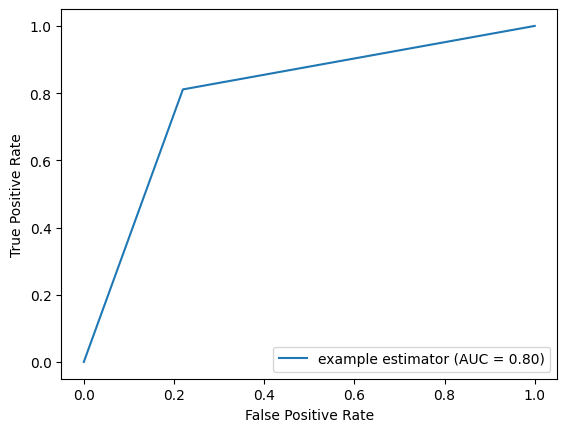

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


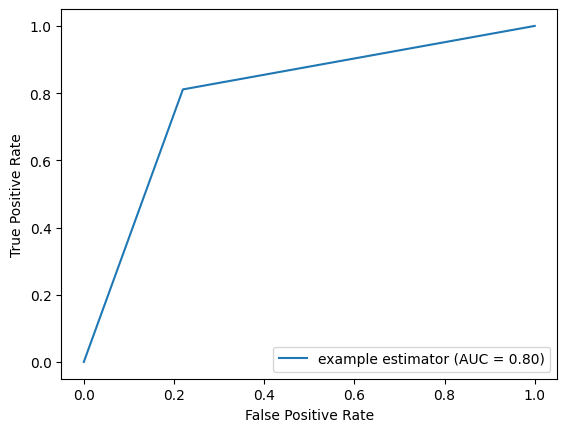

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


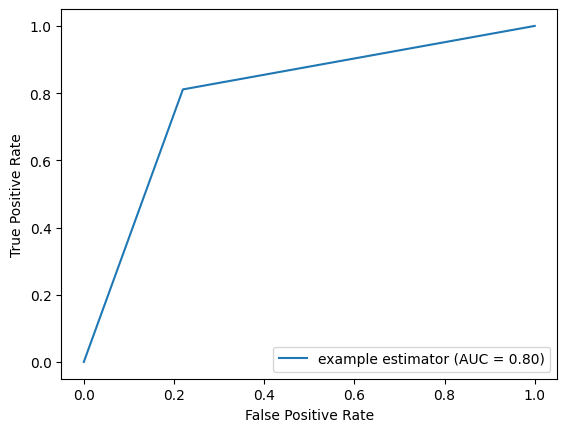

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


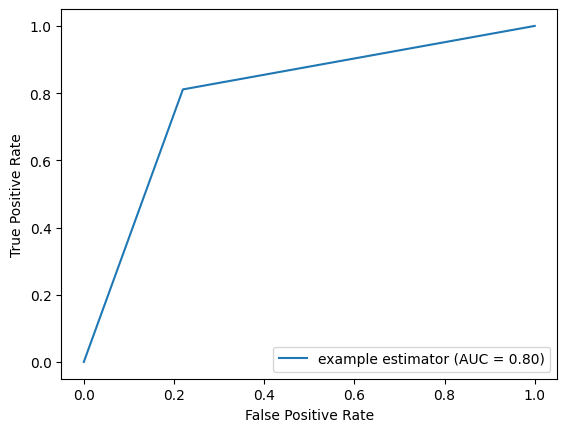

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


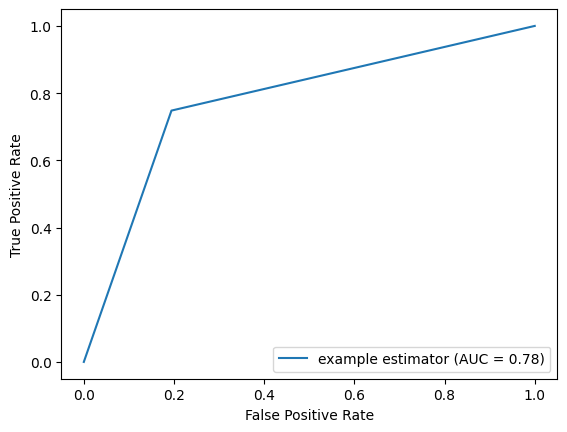

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


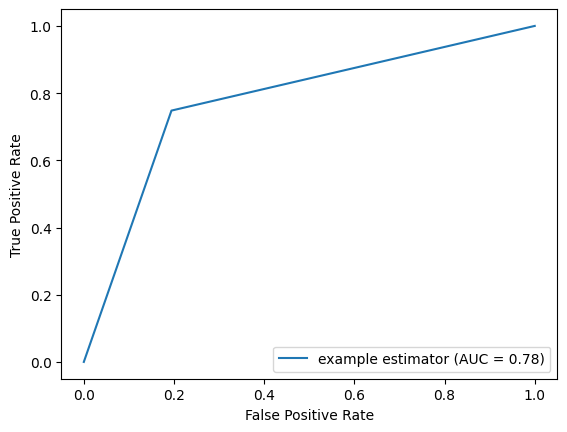

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


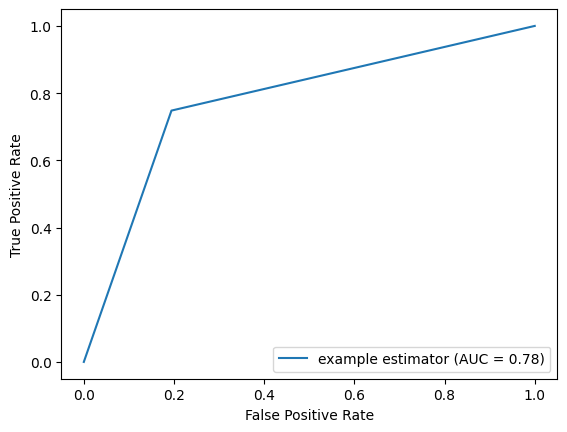

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


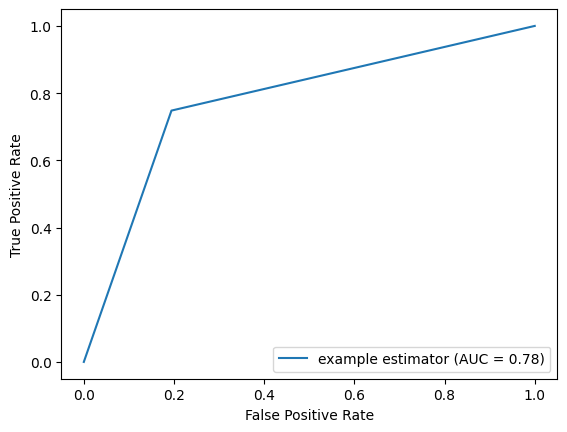

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


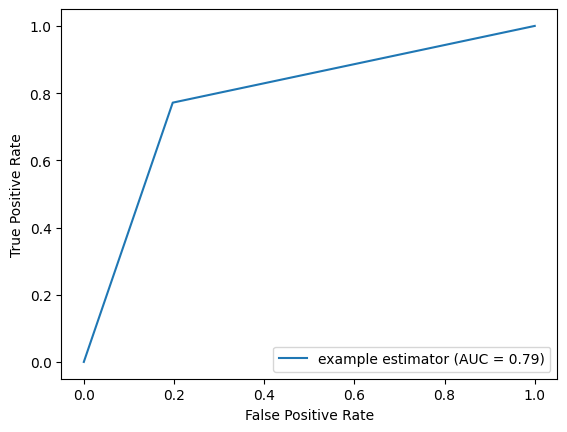

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


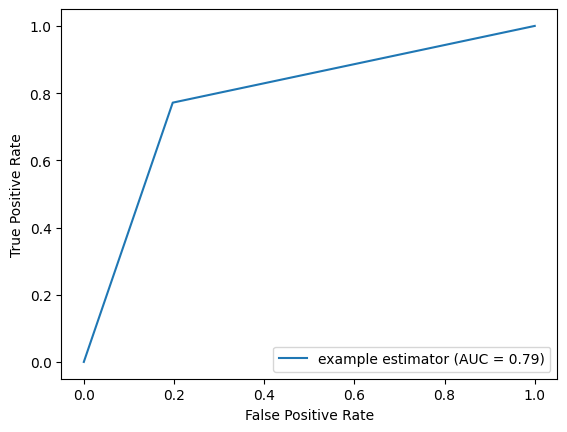

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


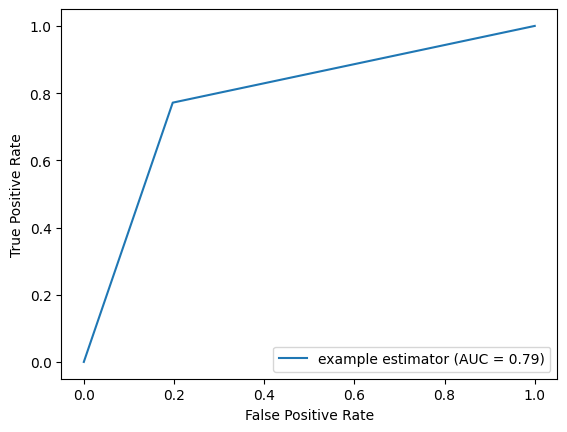

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


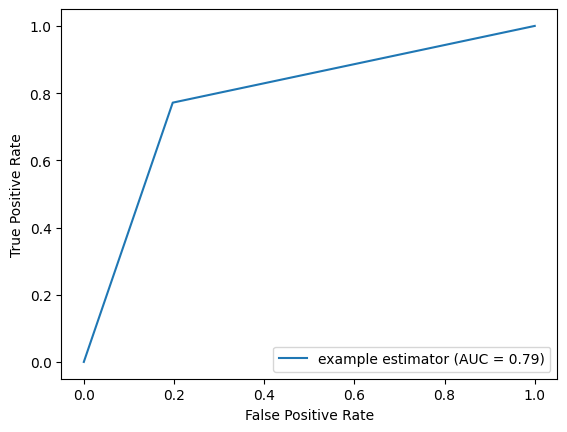

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


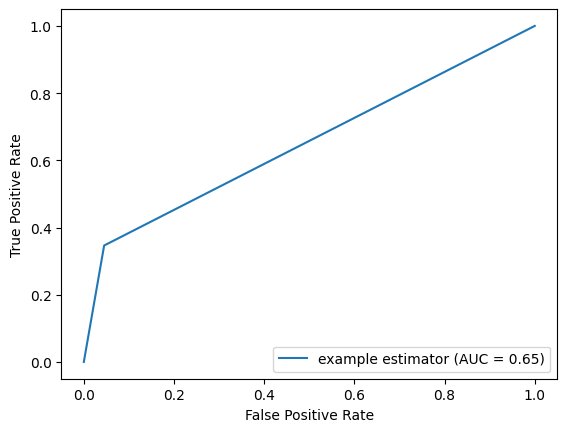

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


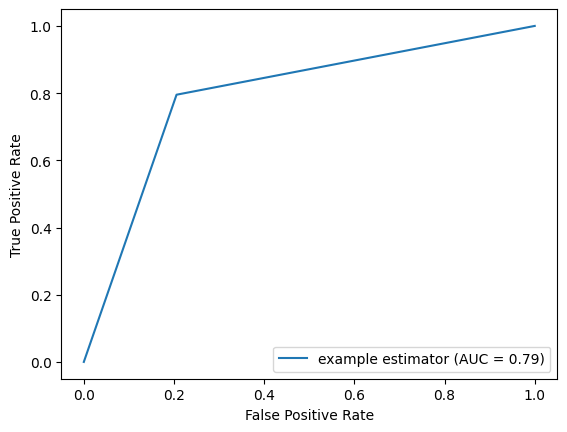

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


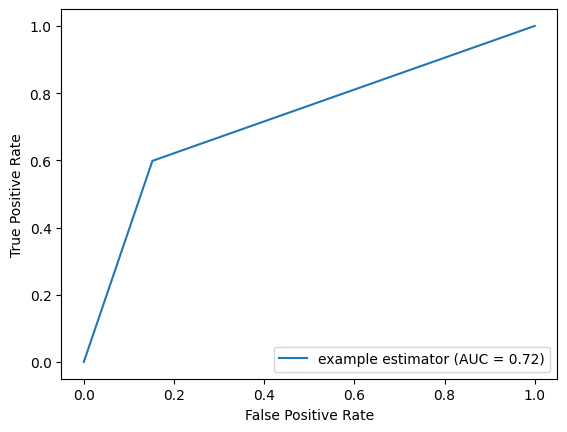

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


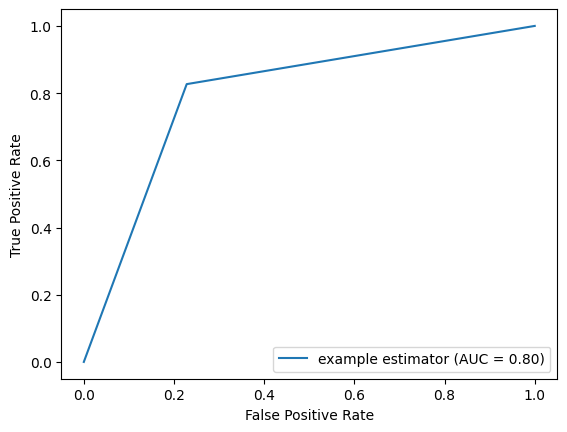

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


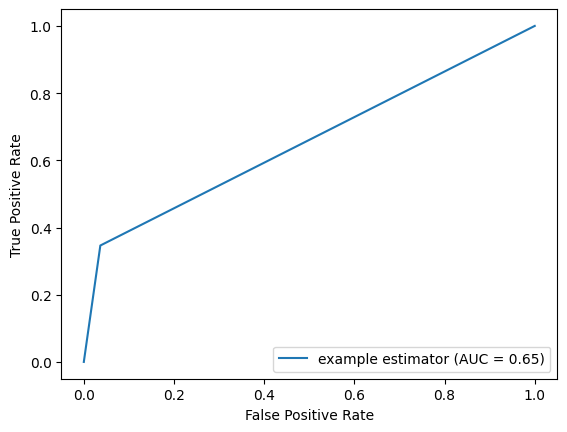

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


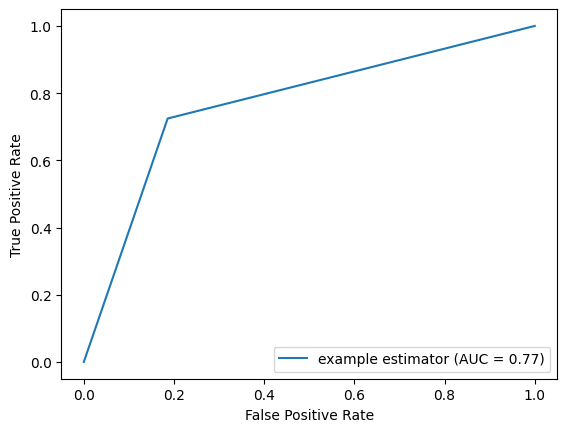

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


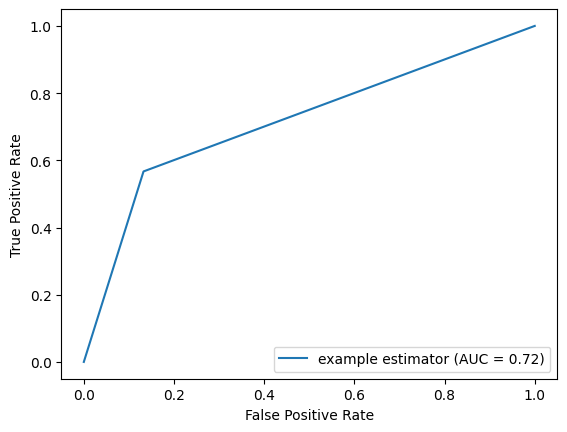

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


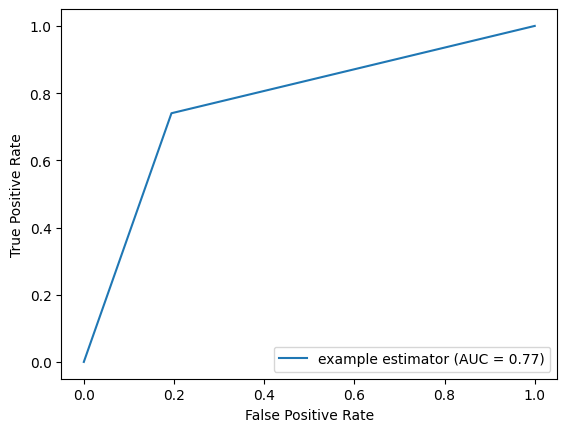

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


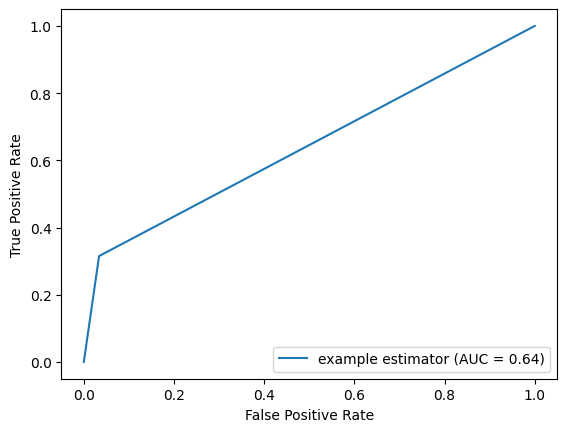

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


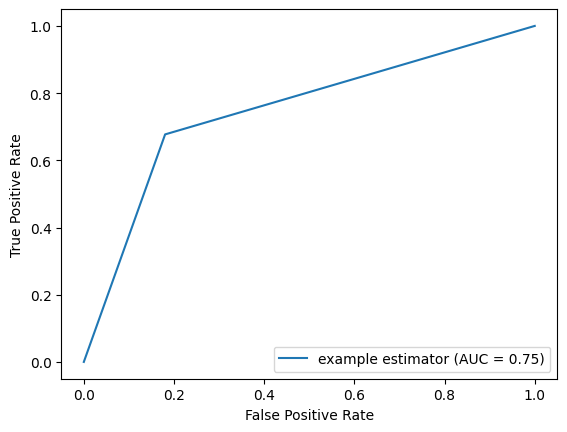

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


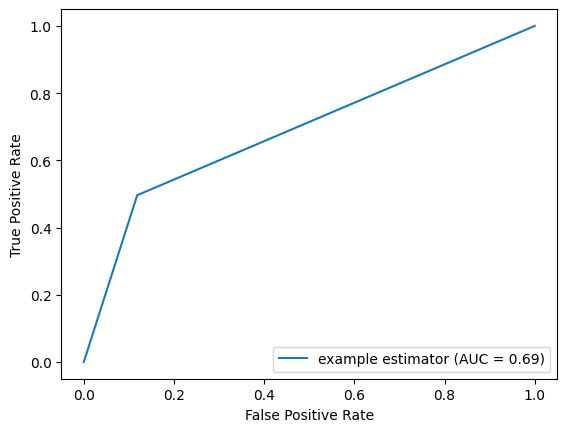

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


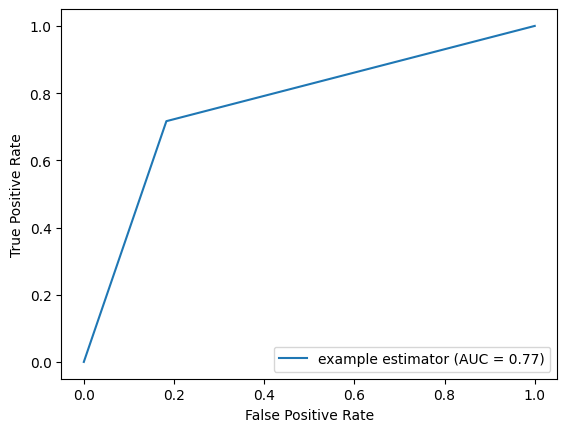

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


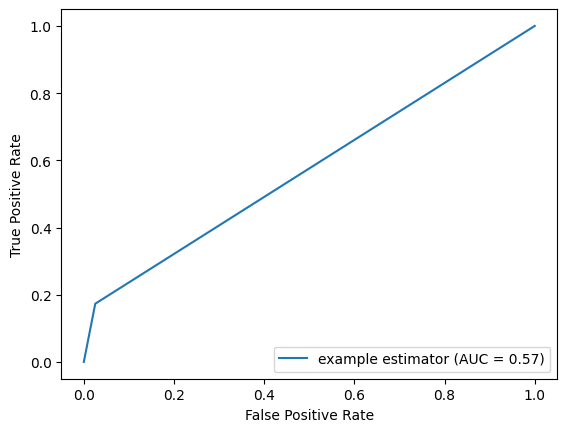

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


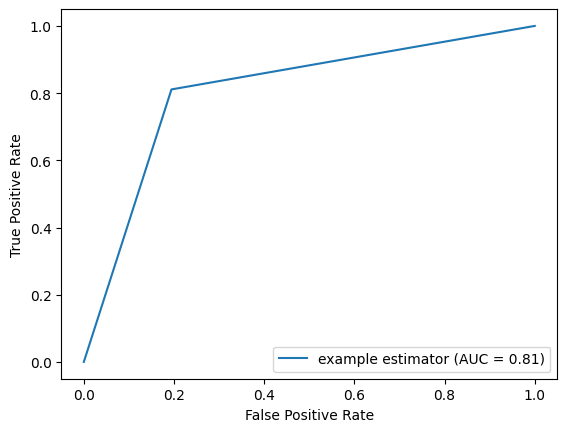

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


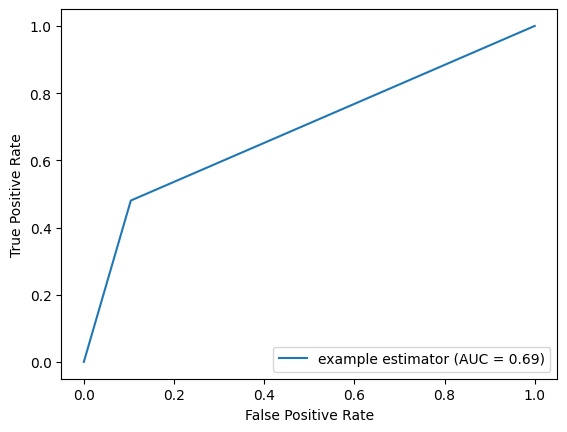

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


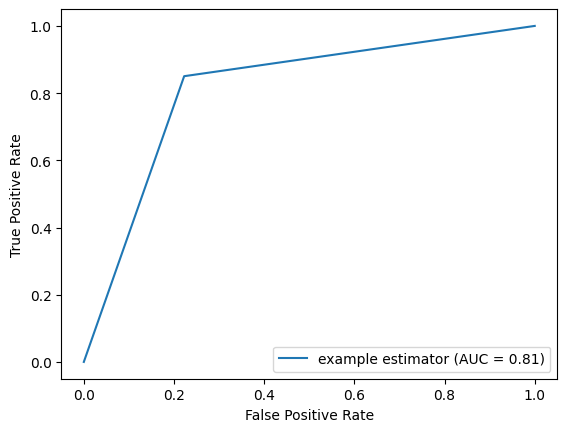

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


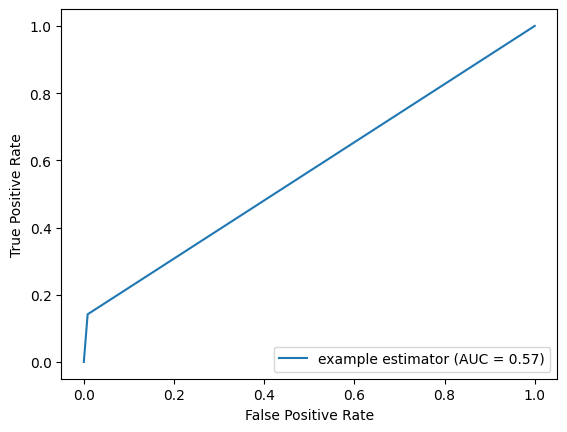

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


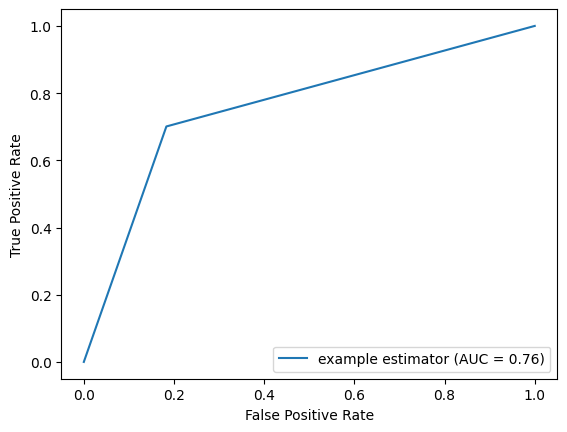

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


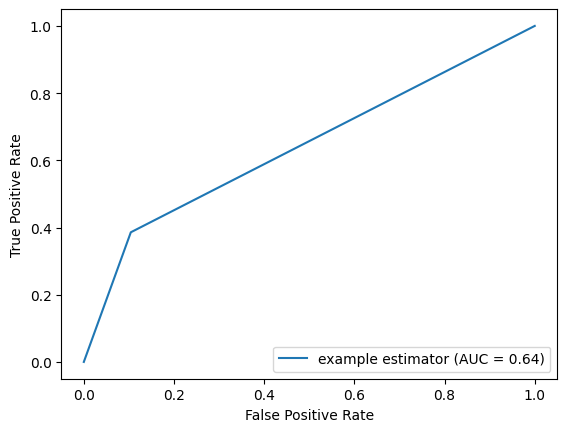

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


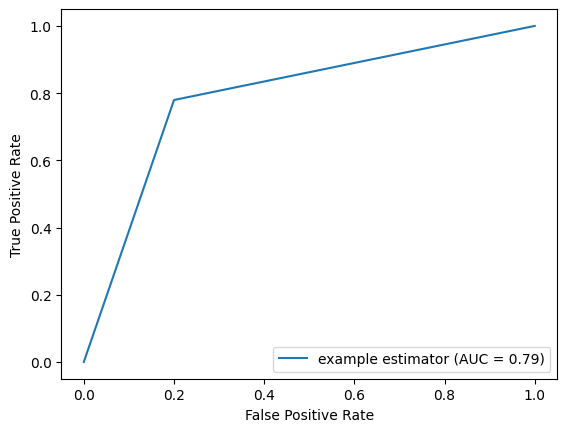

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


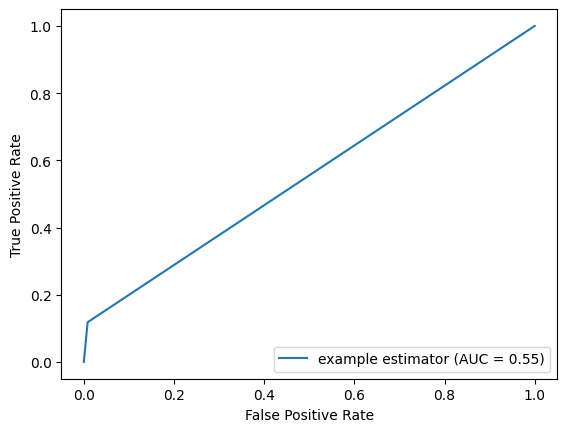

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


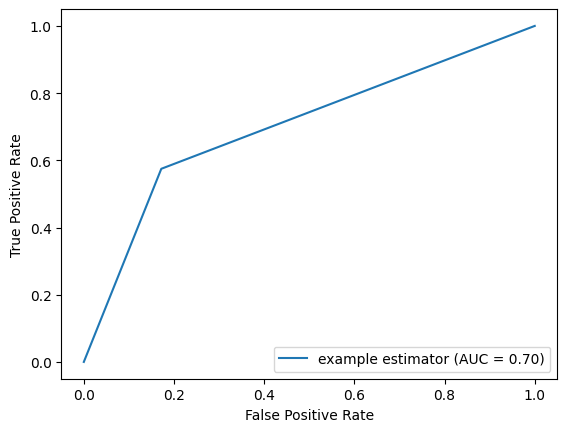

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


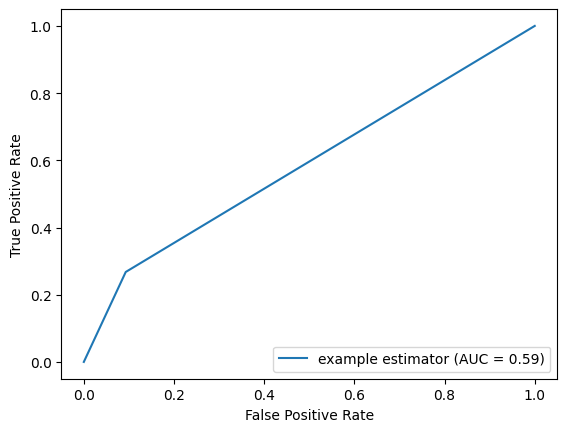

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


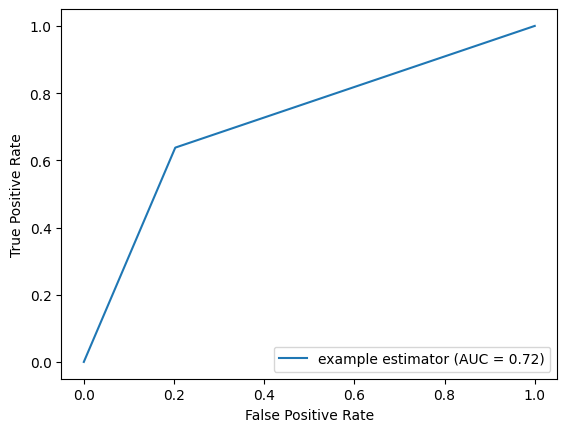

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


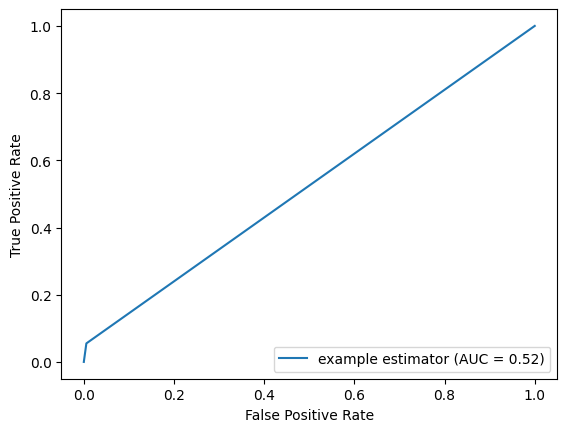

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


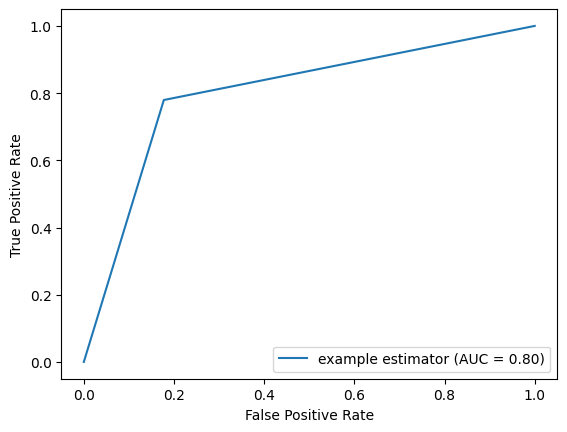

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


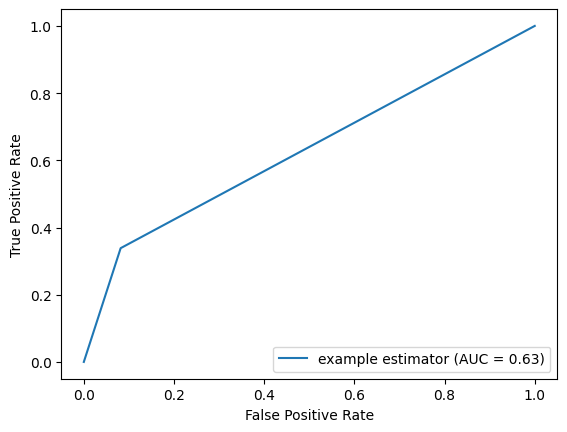

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


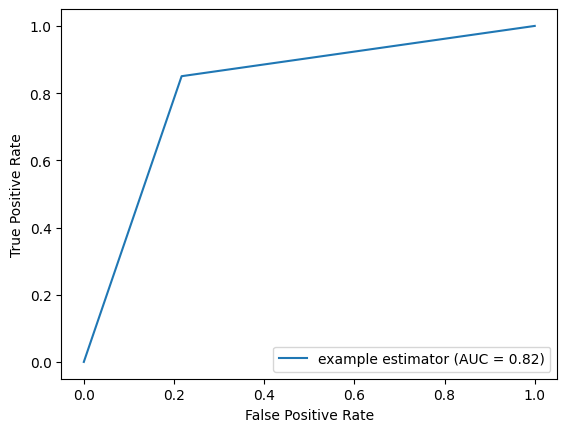

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


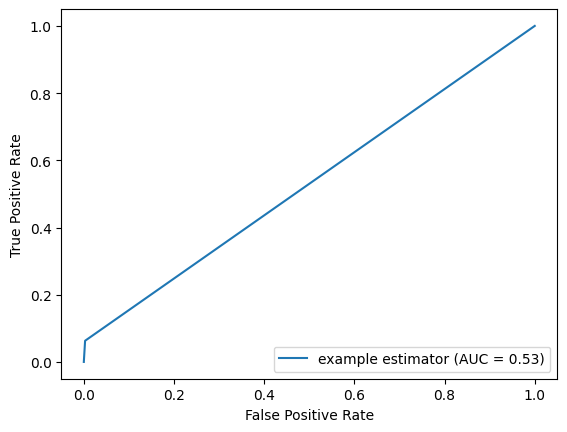

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


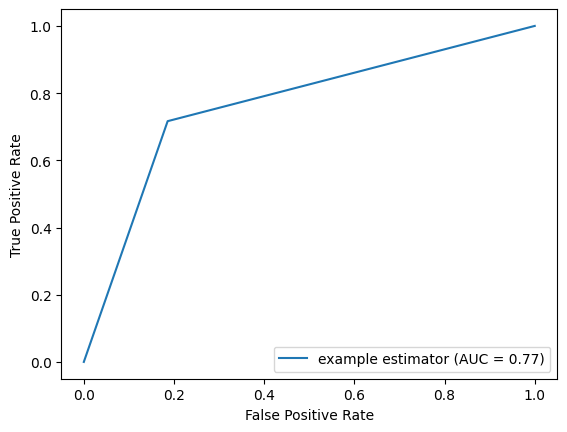

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


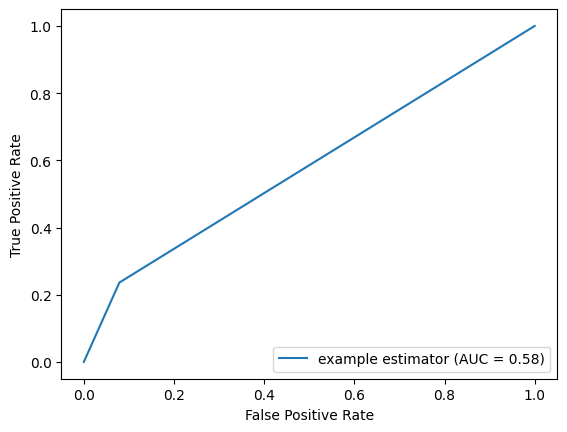

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


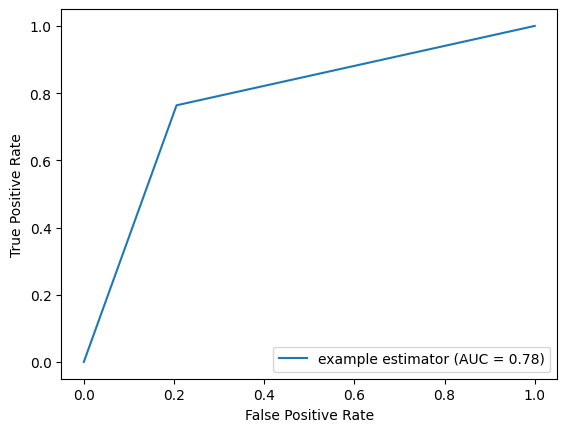

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


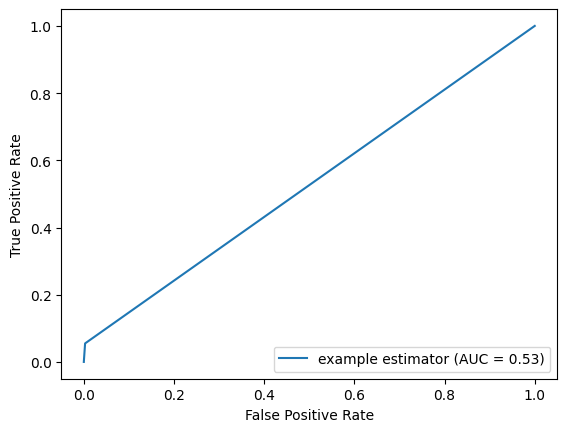

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


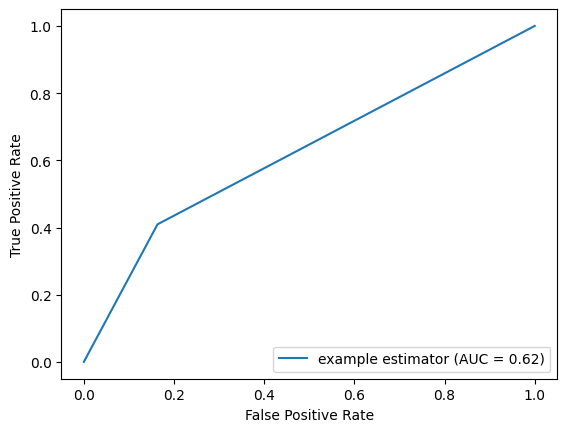

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


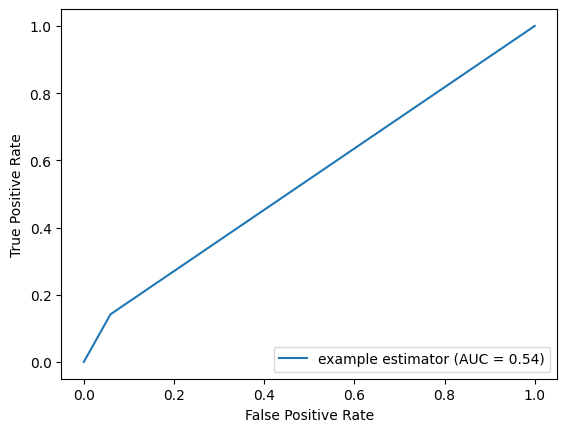

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


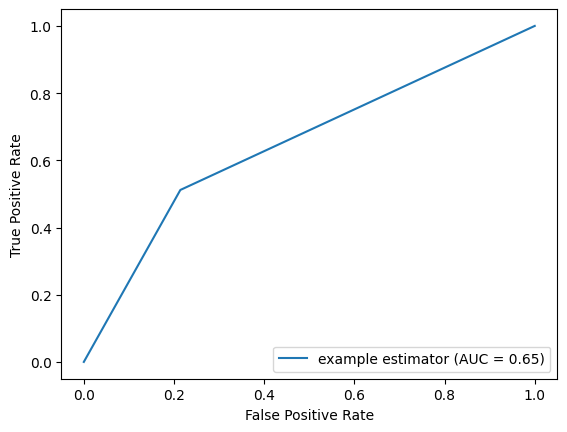

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


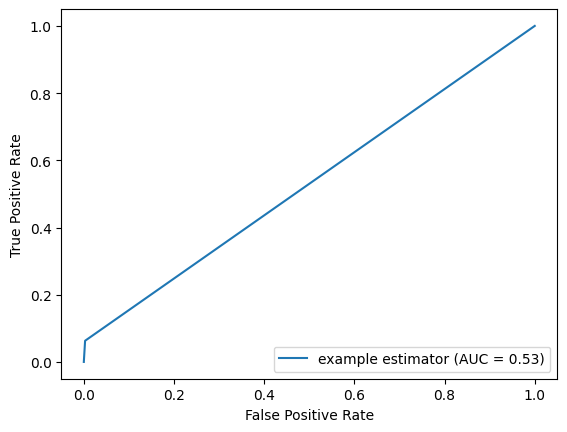

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


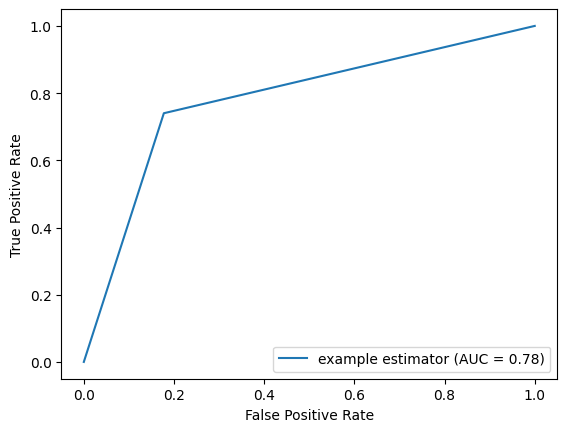

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


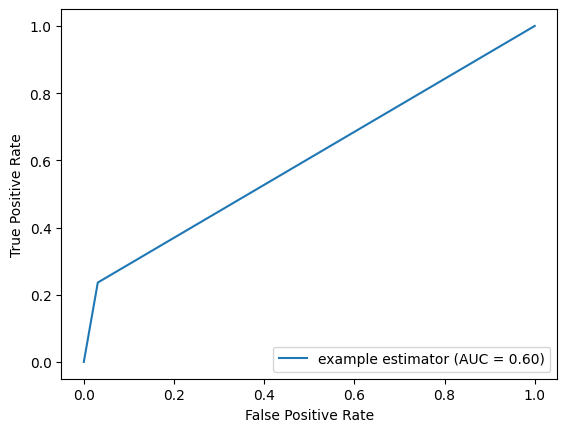

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


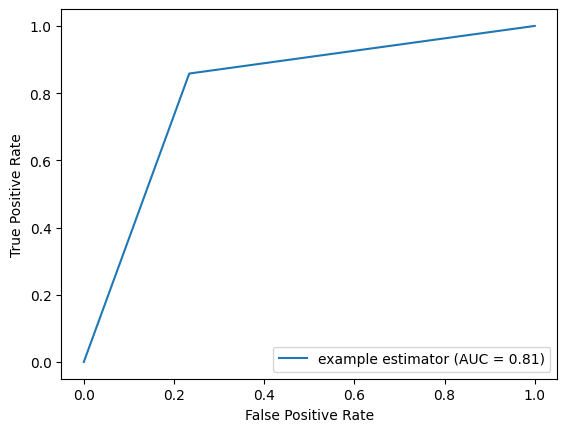

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


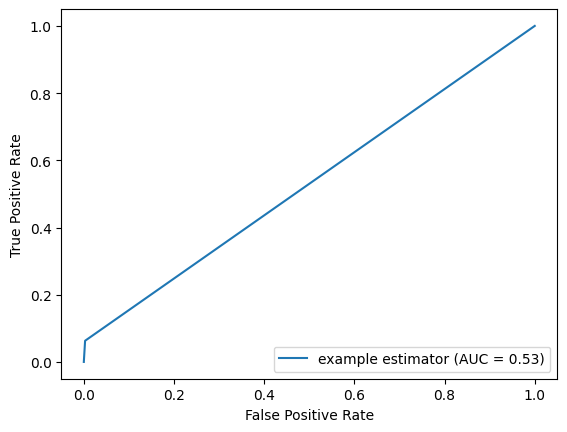

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


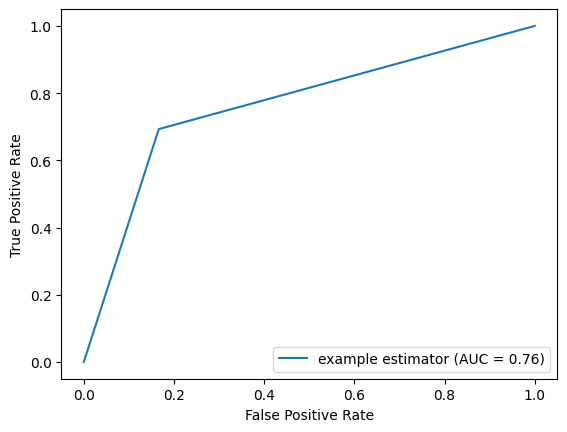

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


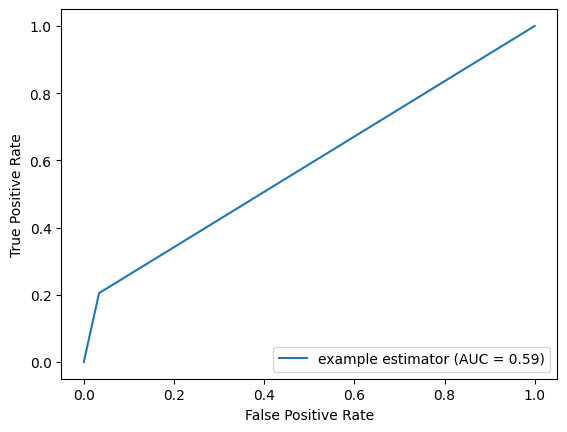

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


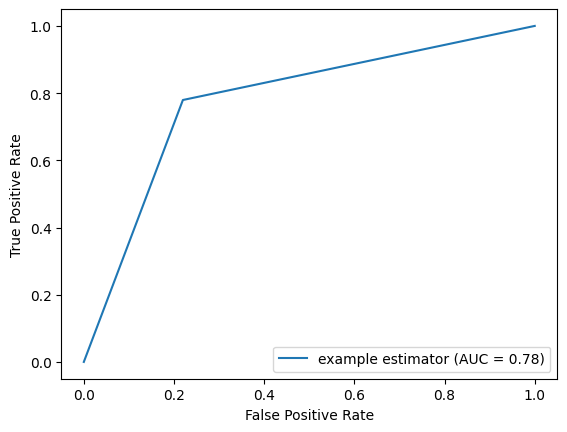

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


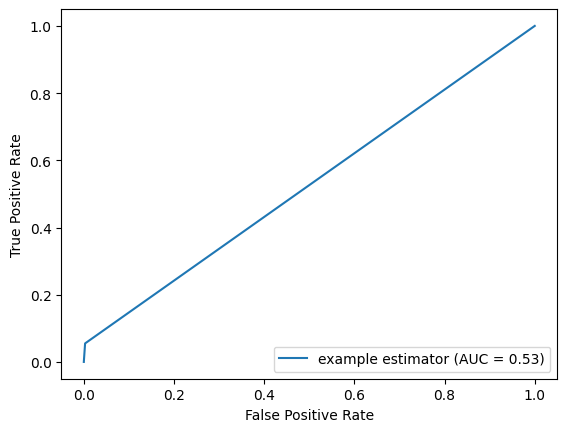

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


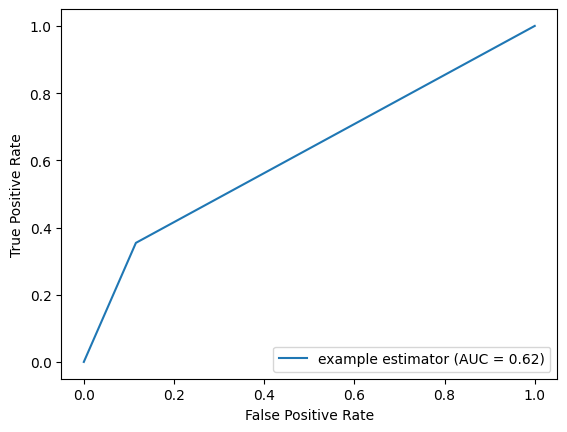

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


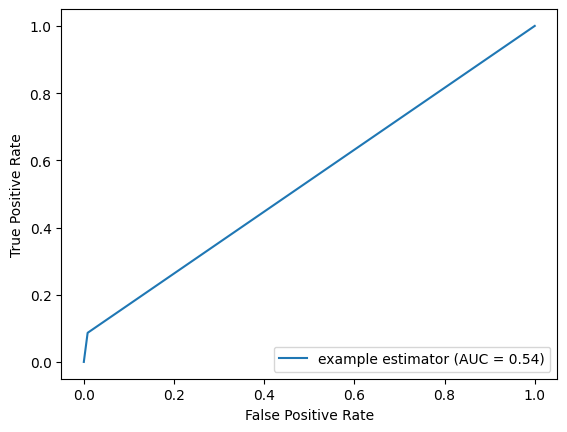

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


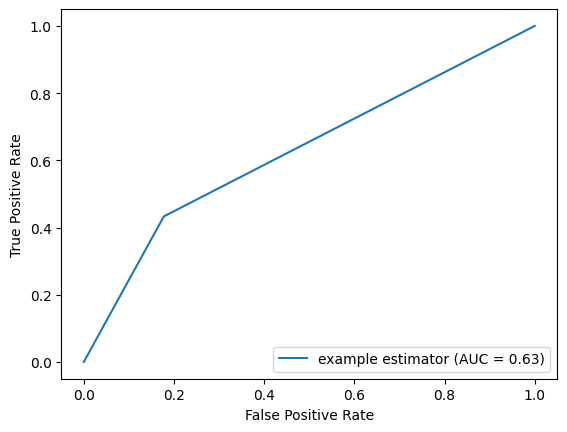

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


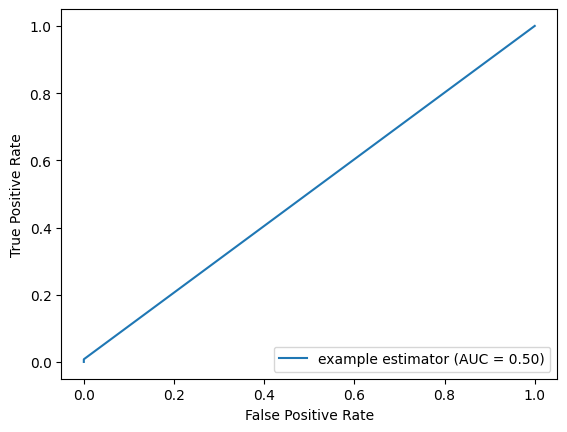

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


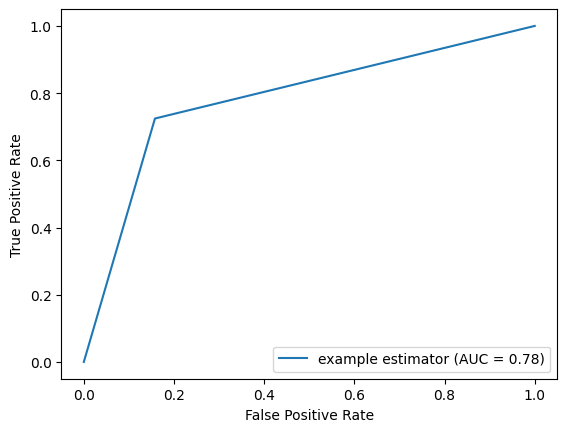

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


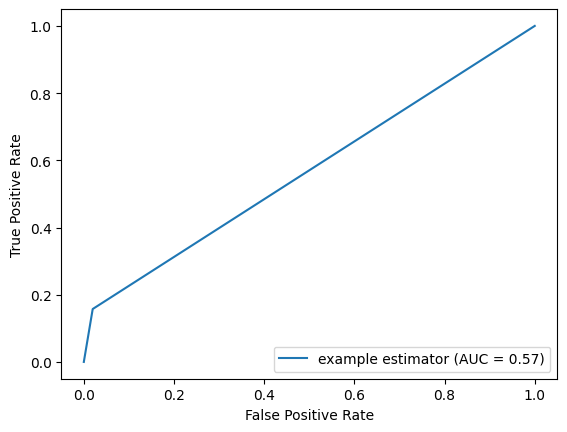

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


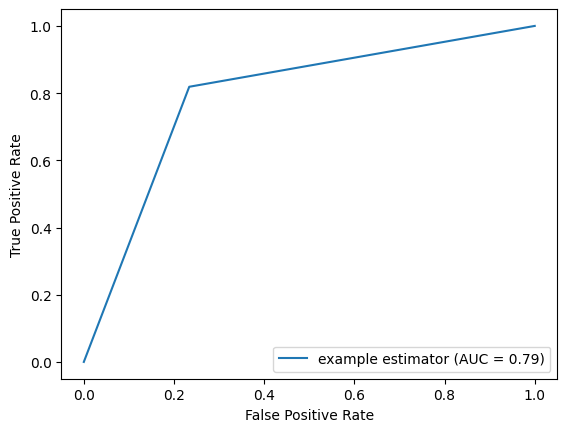

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


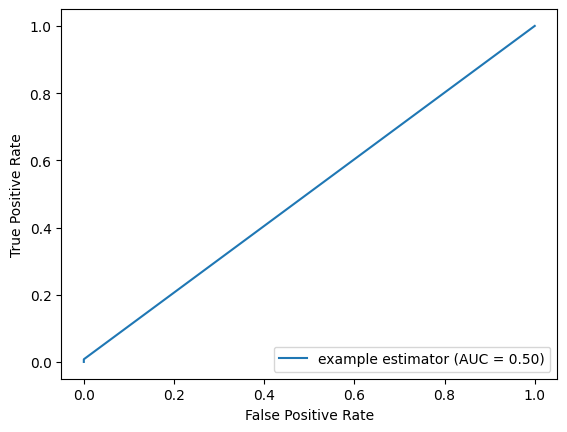

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


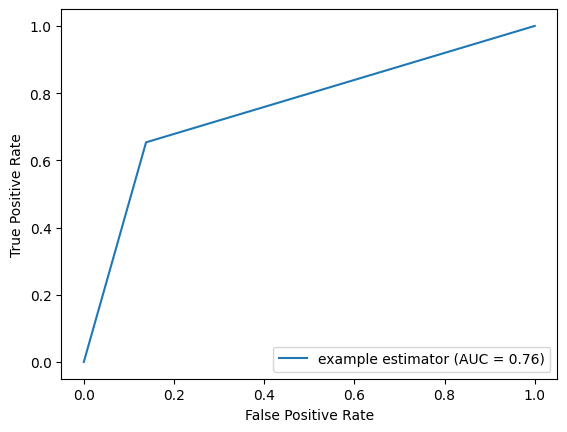

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


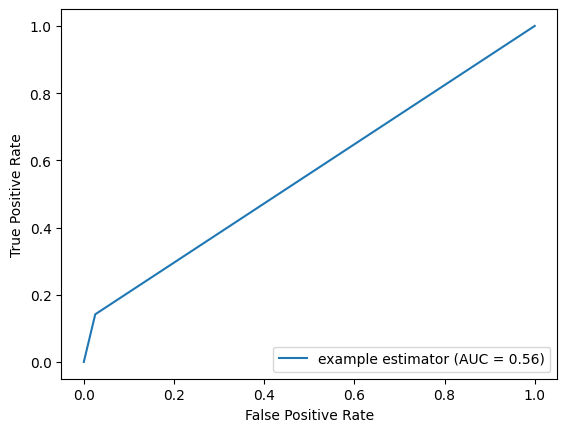

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


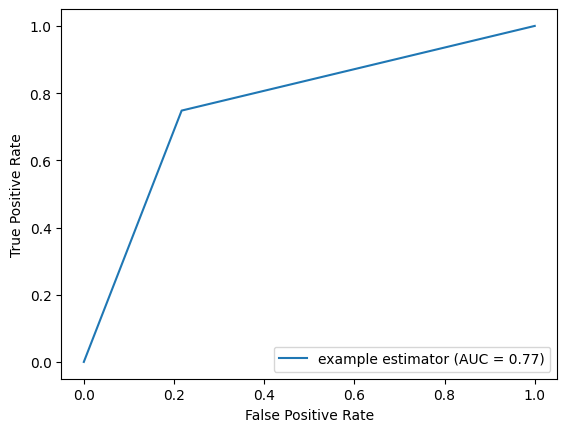

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


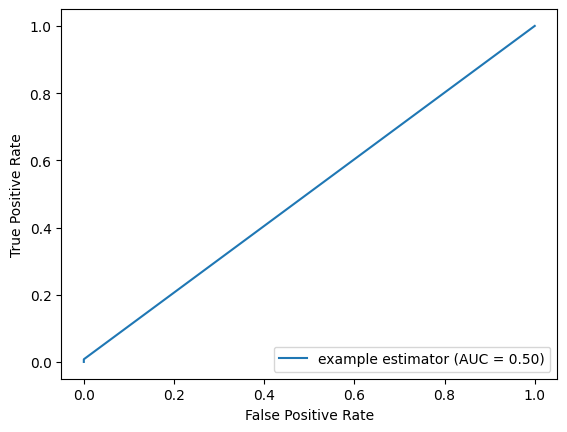

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


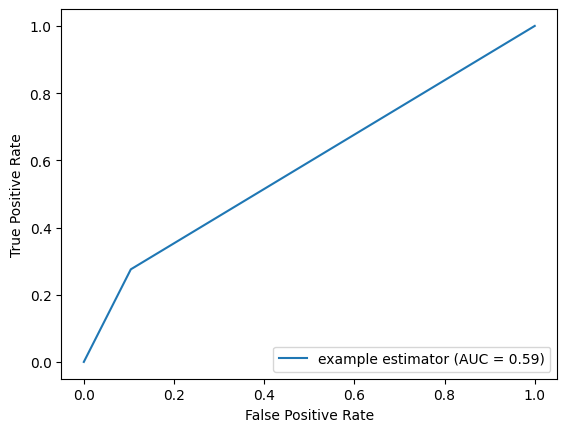

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


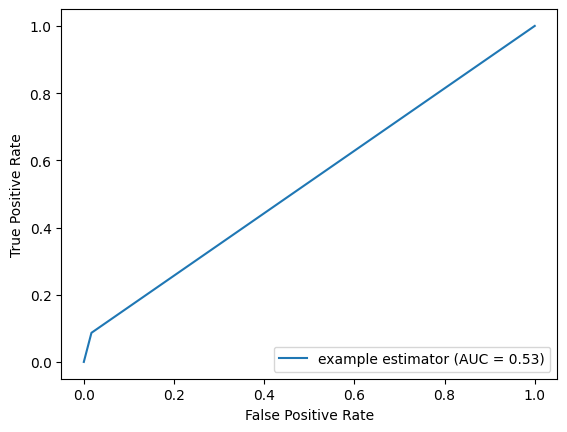

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


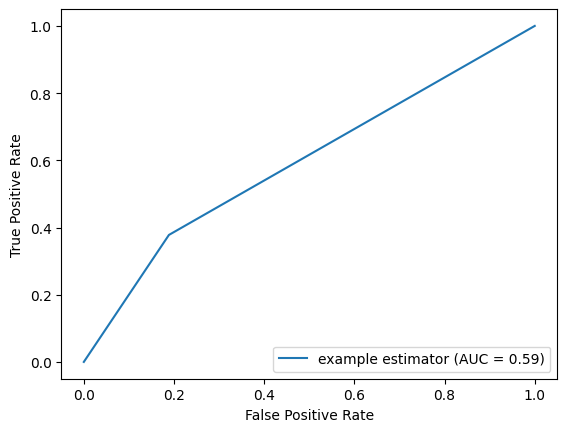

                                          Protein ID  classification  \
0                                      B9A064;P0CG04               0   
1                                        CON__P00761               0   
2             CON__P02768-1;P02768;P02768-3;P02768-2               0   
3         CON__P08779;P08779;CON__Q9Z2K1;CON__Q3ZAW8               0   
4  CON__P13645;P13645;CON__Q148H6;CON__Q2M2I5;Q2M...               0   

   pred classification  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
(482, 3)


In [74]:
for p in probabilities:
    for norm_method in norm_methods:
        for imp_method in imp_methods:
            norm_name, imp_name, add_info = extract_method_info(norm_method, imp_method)
            
            pred_positives_df = pd.read_csv(f"{PROJECT_PATH}\\user_data\\runs\\p{p}\\ba_39_{p}_{norm_name}_{imp_name}{add_info}\\history_dfs\\5-data_analysis-differential_expression-t_test-de_proteins_df.csv")
            pred_positives_protein_list = long_to_wide(pred_positives_df).columns
            classification = []
            for protein in roc_df["Protein ID"]:
                if protein in pred_positives_protein_list:
                    classification.append(1)
                else:
                    classification.append(0)

            pred_classification_df = pd.DataFrame()
            pred_classification_df["Protein ID"] = roc_df["Protein ID"]
            pred_classification_df["pred classification"] = classification
            
            roc_df = roc_df.join(pred_classification_df.set_index('Protein ID'), on="Protein ID")

            fpr, tpr, thresholds = metrics.roc_curve(roc_df["classification"], roc_df["pred classification"],pos_label=1)
            roc_auc = metrics.auc(fpr, tpr)
            display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
            display.plot()
            plt.show()
            print(roc_df.head())
            print(roc_df.shape)
            roc_df.drop(columns=["pred classification"],inplace=True)
